In [13]:
import pandas as pd
import numpy as np
import requests as request
import tweepy as tw
import csv
import urllib.request
import tweepy
from datetime import datetime
import json
import sys
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Gathering of Data

#### import twitter archive

In [14]:
tweet_Archive=pd.read_csv('twitter-archive-enhanced.csv')

#### Download the image prediction using request

In [15]:
csv_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
csv = urllib.request.urlopen(csv_url).read()
with open('image-predictions.tsv', 'wb') as fx:
    fx.write(csv)
img_prediction=pd.read_csv('image-predictions.tsv',sep='\\t')

/Users/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


#### Download Data using tweepy

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [5]:
api = tweepy.API(auth)
tweet_json={}



In [55]:
for tweet_id in tweet_Archive['tweet_id']:
        try:
            start=time.time()
            data=api.get_status(tweet_id,tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
            #print(tweet_id)
            end=time.time()
           # print("query time",end-start)
            tweet_json[str(tweet_id)]=data._json
        except:
            pass

892420643555336193
query time 1.1518070697784424
892177421306343426
query time 1.2093491554260254
891815181378084864
query time 0.5033197402954102
891689557279858688
query time 0.9670877456665039
891327558926688256
query time 1.2580890655517578
891087950875897856
query time 1.3015270233154297
890971913173991426
query time 0.5247342586517334
890729181411237888
query time 0.5195441246032715
890609185150312448
query time 0.5468811988830566
890240255349198849
query time 1.3293468952178955
890006608113172480
query time 1.296104907989502
889880896479866881
query time 1.179499864578247
889665388333682689
query time 1.3026671409606934
889638837579907072
query time 1.5103611946105957
889531135344209921
query time 0.5046813488006592
889278841981685760
query time 1.2643041610717773
888917238123831296
query time 0.5048332214355469
888804989199671297
query time 1.123208999633789
888554962724278272
query time 1.1841020584106445
888078434458587136
query time 0.4863579273223877
887705289381826560
quer

858471635011153920
query time 0.5080511569976807
858107933456039936
query time 1.341217041015625
857989990357356544
query time 0.48479795455932617
857746408056729600
query time 1.3279740810394287
857393404942143489
query time 0.4875640869140625
857263160327368704
query time 1.2957749366760254
857214891891077121
query time 0.5121989250183105
857062103051644929
query time 0.5177302360534668
857029823797047296
query time 0.5268669128417969
856602993587888130
query time 0.5397310256958008
856543823941562368
query time 0.518679141998291
856526610513747968
query time 0.535851001739502
856330835276025856
query time 0.521960973739624
856288084350160898
query time 1.2549479007720947
856282028240666624
query time 1.088984727859497
855862651834028034
query time 0.4956989288330078
855860136149123072
query time 0.7068517208099365
855857698524602368
query time 1.2353270053863525
855851453814013952
query time 1.2212779521942139
855818117272018944
query time 1.3509807586669922
855459453768019968
query

831926988323639298
query time 1.242906093597412
831911600680497154
query time 0.5327680110931396
831670449226514432
query time 1.3008131980895996
831650051525054464
query time 1.344698190689087
831552930092285952
query time 0.4866948127746582
831322785565769729
query time 1.476396083831787
831315979191906304
query time 0.5032541751861572
831309418084069378
query time 0.5426650047302246
831262627380748289
query time 1.3917832374572754
830956169170665475
query time 0.507047176361084
830583320585068544
query time 0.5100631713867188
830173239259324417
query time 0.48859381675720215
830097400375152640
query time 1.224165916442871
829878982036299777
query time 1.1106128692626953
829861396166877184
query time 1.3794360160827637
829501995190984704
query time 1.2736022472381592
829449946868879360
query time 0.5531919002532959
829374341691346946
query time 1.3117952346801758
829141528400556032
query time 0.4839799404144287
829011960981237760
query time 0.5249111652374268
828801551087042563
query

811386762094317568
query time 1.3204259872436523
810984652412424192
query time 1.3137221336364746
810896069567610880
query time 1.2498021125793457
810657578271330305
query time 0.5450098514556885
810284430598270976
query time 0.5076580047607422
810254108431155201
query time 1.1475598812103271
809920764300447744
query time 1.3139238357543945
809808892968534016
query time 1.1338880062103271
809448704142938112
query time 0.519277811050415
809220051211603969
query time 0.48535919189453125
809084759137812480
query time 1.1268327236175537
808838249661788160
query time 1.2277679443359375
808733504066486276
query time 0.48792123794555664
808501579447930884
query time 1.091454029083252
808344865868283904
query time 1.1900198459625244
808134635716833280
query time 0.5168828964233398
808106460588765185
query time 0.4974379539489746
808001312164028416
query time 0.4996910095214844
807621403335917568
query time 1.1704540252685547
807106840509214720
query time 0.517953634262085
807059379405148160
qu

788178268662984705
query time 0.5180387496948242
788150585577050112
query time 1.2717528343200684
788070120937619456
query time 1.162635087966919
788039637453406209
query time 1.117199182510376
787810552592695296
query time 0.5097560882568359
787717603741622272
query time 0.5192151069641113
787397959788929025
query time 1.2033560276031494
787322443945877504
query time 0.49989819526672363
787111942498508800
query time 0.512963056564331
786963064373534720
query time 1.2554898262023926
786729988674449408
query time 0.5006000995635986
786709082849828864
query time 1.3390190601348877
786664955043049472
query time 0.5221278667449951
786595970293370880
query time 0.5418729782104492
786363235746385920
query time 0.4959568977355957
786286427768250368
query time 1.2136359214782715
786233965241827333
query time 0.5058879852294922
786051337297522688
query time 0.49358487129211426
786036967502913536
query time 0.589587926864624
785927819176054784
query time 1.1784391403198242
785872687017132033
que

765371061932261376
query time 1.2655620574951172
765222098633691136
query time 1.1750059127807617
764857477905154048
query time 1.2472960948944092
764259802650378240
query time 1.3347671031951904
763956972077010945
query time 1.3117070198059082
763837565564780549
query time 0.48572421073913574
763183847194451968
query time 0.501774787902832
763167063695355904
query time 1.2628741264343262
763103485927849985
query time 0.5157496929168701
762699858130116608
query time 0.5031390190124512
762471784394268675
query time 0.5008080005645752
762464539388485633
query time 1.1680219173431396
762316489655476224
query time 0.4838840961456299
762035686371364864
query time 0.5061221122741699
761976711479193600
query time 1.0798709392547607
761750502866649088
query time 1.0715446472167969
761745352076779520
query time 1.1793289184570312
761672994376806400
query time 0.5173020362854004
761599872357261312
query time 0.885638952255249
761371037149827077
query time 1.3272440433502197
761334018830917632
qu

Rate limit reached. Sleeping for: 90


758474966123810816
query time 96.80556797981262
758467244762497024
query time 1.250493049621582
758405701903519748
query time 0.559697151184082
758355060040593408
query time 0.4912261962890625
758099635764359168
query time 1.206624984741211
758041019896193024
query time 1.1632170677185059
757741869644341248
query time 0.5164222717285156
757729163776290825
query time 1.1073968410491943
757725642876129280
query time 1.2682280540466309
757611664640446465
query time 0.4956939220428467
757597904299253760
query time 0.4972071647644043
757596066325864448
query time 0.5668230056762695
757400162377592832
query time 1.1404480934143066
757393109802180609
query time 0.5148658752441406
757354760399941633
query time 1.1003789901733398
756998049151549440
query time 1.2109448909759521
756939218950160384
query time 1.4038641452789307
756651752796094464
query time 0.48363685607910156
756526248105566208
query time 1.2546262741088867
756303284449767430
query time 1.332111120223999
756288534030475264
query

740365076218183684
query time 1.2598567008972168
740359016048689152
query time 0.5186100006103516
740214038584557568
query time 0.5317692756652832
739979191639244800
query time 1.1647591590881348
739932936087216128
query time 1.3181862831115723
739844404073074688
query time 0.5021228790283203
739623569819336705
query time 1.3018040657043457
739606147276148736
query time 0.5193688869476318
739544079319588864
query time 0.5325460433959961
739485634323156992
query time 0.5288350582122803
739238157791694849
query time 1.2864830493927002
738891149612572673
query time 2.286911964416504
738885046782832640
query time 0.5118229389190674
738883359779196928
query time 1.2886936664581299
738537504001953792
query time 0.5397188663482666
738402415918125056
query time 0.5422470569610596
738184450748633089
query time 0.5244441032409668
738166403467907072
query time 1.3066623210906982
738156290900254721
query time 1.1035590171813965
737826014890496000
query time 0.503314733505249
737800304142471168
que

712309440758808576
query time 0.6344690322875977
712097430750289920
query time 1.233036994934082
712092745624633345
query time 1.1315419673919678
712085617388212225
query time 1.1390550136566162
712065007010385924
query time 0.5599470138549805
711998809858043904
query time 0.5468990802764893
711968124745228288
query time 0.5099201202392578
711743778164514816
query time 2.160320997238159
711732680602345472
query time 1.0828032493591309
711694788429553666
query time 1.218183994293213
711652651650457602
query time 0.5584089756011963
711363825979756544
query time 1.2335782051086426
711306686208872448
query time 0.4983329772949219
711008018775851008
query time 1.247016191482544
710997087345876993
query time 0.5639381408691406
710844581445812225
query time 0.572857141494751
710833117892898816
query time 0.48595309257507324
710658690886586372
query time 1.285459041595459
710609963652087808
query time 1.3792648315429688
710588934686908417
query time 0.5301730632781982
710296729921429505
query 

699323444782047232
query time 0.5566599369049072
699088579889332224
query time 1.7546029090881348
699079609774645248
query time 0.5586047172546387
699072405256409088
query time 0.5537168979644775
699060279947165696
query time 0.5355451107025146
699036661657767936
query time 1.4995830059051514
698989035503689728
query time 0.5098311901092529
698953797952008193
query time 1.2329990863800049
698907974262222848
query time 0.575293779373169
698710712454139905
query time 1.6646029949188232
698703483621523456
query time 2.9572501182556152
698635131305795584
query time 0.5257089138031006
698549713696649216
query time 0.5386419296264648
698355670425473025
query time 0.5019838809967041
698342080612007937
query time 0.5359928607940674
698262614669991936
query time 0.5225329399108887
698195409219559425
query time 1.2695040702819824
698178924120031232
query time 0.5617132186889648
697995514407682048
query time 1.179778814315796
697990423684476929
query time 1.2595329284667969
697943111201378304
que

687494652870668288
query time 1.108835220336914
687480748861947905
query time 1.241145133972168
687476254459715584
query time 1.1677770614624023
687460506001633280
query time 1.405674934387207
687399393394311168
query time 1.2371330261230469
687317306314240000
query time 0.5136411190032959
687312378585812992
query time 1.5013151168823242
687127927494963200
query time 1.428487777709961
687124485711986689
query time 0.8298468589782715
687109925361856513
query time 1.3720979690551758
687102708889812993
query time 1.366898775100708
687096057537363968
query time 1.2726199626922607
686947101016735744
query time 1.2783968448638916
686760001961103360
query time 1.2907261848449707
686749460672679938
query time 1.1215479373931885
686730991906516992
query time 0.5191130638122559
686683045143953408
query time 1.341939926147461
686618349602762752
query time 0.4905118942260742
686606069955735556
query time 0.5012979507446289
686394059078897668
query time 1.2376229763031006
686386521809772549
query t

679475951516934144
query time 1.068140983581543
679462823135686656
query time 1.3965120315551758
679405845277462528
query time 0.48438310623168945
679158373988876288
query time 1.1144700050354004
679148763231985668
query time 1.3972318172454834
679132435750195208
query time 1.2152912616729736
679111216690831360
query time 1.3930790424346924
679062614270468097
query time 0.5144801139831543
679047485189439488
query time 0.5364358425140381
679001094530465792
query time 1.222080945968628
678991772295516161
query time 1.3362648487091064
678969228704284672
query time 0.49020886421203613
678800283649069056
query time 1.4559028148651123
678798276842360832
query time 1.3451359272003174
678774928607469569
query time 0.5567600727081299
678767140346941444
query time 0.5509178638458252
678764513869611008
query time 1.1650710105895996
678755239630127104
query time 1.4617688655853271
678740035362037760
query time 0.5873029232025146
678708137298427904
query time 0.5465869903564453
678675843183484930
q

Rate limit reached. Sleeping for: 55


676949632774234114
query time 1.951469898223877
676948236477857792
query time 0.6716487407684326
676946864479084545
query time 1.4315879344940186
676942428000112642
query time 0.6352729797363281
676936541936185344
query time 1.2774078845977783
676916996760600576
query time 0.6005599498748779
676897532954456065
query time 1.4307093620300293
676864501615042560
query time 0.5148928165435791
676821958043033607
query time 1.3217439651489258
676819651066732545
query time 0.5764141082763672
676811746707918848
query time 1.2732269763946533
676776431406465024
query time 1.2778229713439941
676617503762681856
query time 2.339918851852417
676613908052996102
query time 1.482316017150879
676606785097199616
query time 0.5362770557403564
676603393314578432
query time 0.5002098083496094
676593408224403456
query time 1.4918720722198486
676590572941893632
query time 0.5454678535461426
676588346097852417
query time 1.4219000339508057
676582956622721024
query time 1.644477128982544
676575501977128964
query

673295268553605120
query time 0.5152490139007568
673270968295534593
query time 1.661525011062622
673240798075449344
query time 0.578765869140625
673213039743795200
query time 1.551760196685791
673148804208660480
query time 0.6539549827575684
672997845381865473
query time 0.5254342555999756
672995267319328768
query time 0.5621988773345947
672988786805112832
query time 0.7502241134643555
672984142909456390
query time 0.572990894317627
672980819271634944
query time 0.5773108005523682
672975131468300288
query time 0.5628821849822998
672970152493887488
query time 0.5511858463287354
672968025906282496
query time 0.7080690860748291
672964561327235073
query time 0.5889120101928711
672902681409806336
query time 1.481349229812622
672898206762672129
query time 0.5152969360351562
672884426393653248
query time 0.6883130073547363
672877615439593473
query time 1.144075870513916
672834301050937345
query time 0.5252707004547119
672828477930868736
query time 0.5779950618743896
672640509974827008
query t

670037189829525505
query time 0.5386581420898438
670003130994700288
query time 0.7429549694061279
669993076832759809
query time 0.5381631851196289
669972011175813120
query time 1.650745153427124
669970042633789440
query time 0.5546810626983643
669942763794931712
query time 1.4065427780151367
669926384437997569
query time 0.6443607807159424
669923323644657664
query time 1.6666550636291504
669753178989142016
query time 1.750040054321289
669749430875258880
query time 1.4820070266723633
669684865554620416
query time 0.5700528621673584
669683899023405056
query time 1.6338441371917725
669682095984410625
query time 0.7025120258331299
669680153564442624
query time 1.6219170093536377
669661792646373376
query time 0.6551542282104492
669625907762618368
query time 1.7502830028533936
669603084620980224
query time 1.303548812866211
669597912108789760
query time 0.5067269802093506
669583744538451968
query time 0.6383390426635742
669573570759163904
query time 1.482452154159546
669571471778410496
query

666826780179869698
query time 0.608849048614502
666817836334096384
query time 0.6587152481079102
666804364988780544
query time 0.5521903038024902
666786068205871104
query time 0.6646301746368408
666781792255496192
query time 0.6217200756072998
666776908487630848
query time 1.460787057876587
666739327293083650
query time 0.6619770526885986
666701168228331520
query time 0.5434858798980713
666691418707132416
query time 1.4095587730407715
666649482315059201
query time 1.4836740493774414
666644823164719104
query time 0.5696399211883545
666454714377183233
query time 0.5401549339294434
666447344410484738
query time 0.6294999122619629
666437273139982337
query time 0.5136559009552002
666435652385423360
query time 0.5613198280334473
666430724426358785
query time 0.5833930969238281
666428276349472768
query time 1.5347542762756348
666421158376562688
query time 1.517125129699707
666418789513326592
query time 1.6029319763183594
666411507551481857
query time 0.5420112609863281
666407126856765440
quer

###### Writing json to a file

In [57]:
with open('tweet_json.txt','w') as outfile:
    json.dump(tweet_json,outfile,sort_keys=True,indent=4, ensure_ascii = False)

###### Reading from a json file

In [16]:
tweetJson_df=pd.read_json('tweet_json.txt',orient='index')


##### Visual assessment

In [17]:
tweet_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
img_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
tweetJson_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2564,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,519,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,Here is a very happy pup. Big fan of well-main...,NaN,...,0.0,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,300,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,0.0,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,0.0,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


##### Programattic assessment

In [20]:
tweet_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Assessing the Data

#### Quality

#### Twitter Archive table

1.Remove (+0000)from timestamp

2.Remove (+0000)from retweeted_status_timestamp

3.Convert timestamp datatype to DateTime object

4.Convert retweeted_status_timestamp datatype to dateTime object

5.In text remove the incorrect http link

6.Some of Rating numerator are very high

7.Name of dog is not same as in tweet.



####  Image Prediction

 8). proper case and remove underscore from dogs name

 #### Tidiness 

#### Twitter Archive

1)Merger four columns doggo,floofer,pupper and pupoo to make single column called species.Since all reprsent certain kind of Species


#### Image Prediction

2) drop image num (there is no significance of column)

###### Make a copy of original data

In [22]:
tweet_archive_copy=tweet_Archive.copy()
img_prediction_copy=img_prediction.copy()
tweet_archive_copy.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2297,667073648344346624,NaN,NaN,2015-11-18 20:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Dave. He is actually just a skinny leg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None


In [23]:
img_prediction_copy.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
759,688804835492233216,https://pbs.twimg.com/media/CY8gWFRWUAAm1XL.jpg,3,malinois,0.199512,True,German_shepherd,0.096797,True,Saluki,0.082848,True
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False


#### Quality

#### Twitter Archive table

1.Remove (+0000)from timestamp



##### Define

Replace '0000' and '+' from timestamp of tweet_archive_copy using replace method

#### code

In [24]:
tweet_archive_copy['timestamp']=tweet_archive_copy['timestamp'].str.replace("0000","")
tweet_archive_copy['timestamp']=tweet_archive_copy['timestamp'].str.replace("+","")


##### test 

In [25]:
tweet_archive_copy.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
540,806542213899489280,NaN,NaN,2016-12-07 16:53:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


2.Remove (+0000)from retweeted_status_timestamp



#### Define

Replace '0000' and '+' from retweeted_status_timestamp of tweet_archive_copy using replace method

#### Code

In [26]:
tweet_archive_copy['retweeted_status_timestamp']=tweet_archive_copy['retweeted_status_timestamp'].str.replace("0000","")
tweet_archive_copy['retweeted_status_timestamp']=tweet_archive_copy['retweeted_status_timestamp'].str.replace("+","")


##### test

In [27]:
tweet_archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


3.Convert timestamp datatype to DateTime object



#### Define

Convert timestamp to datetime object  by using pd.to_datetime method 

#### Code

In [28]:
tweet_archive_copy['timestamp']=pd.to_datetime(tweet_archive_copy['timestamp'])

##### test

In [29]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

4.Convert retweeted_status_timestamp datatype to dateTime object



#### Define

convert retweeted_status_timestamp to datetime object by using pd.to_datetime method

#### Code

In [30]:
tweet_archive_copy['retweeted_status_timestamp']=pd.to_datetime(tweet_archive_copy['retweeted_status_timestamp'])

###### test

In [31]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

5.Remove the incorrect http link


#### Define

1.GO through each row of retweeted_status_timestamp dataframe

2.Find the tweet that contain http

3.Check its length is less than equal to 15 then it must be incorrect http link

4.Remove the https links from particular row using index

#### Code

In [32]:
for index,row in tweet_archive_copy.iterrows():
    tweet=row['text']
    link=[t for t in tweet.split() if t.startswith('http')]
    if(len(link)>0):
        if(len(link[0])<=15):
            tweet_archive_copy.set_value(index,'text',tweet.replace(link[0],""))           

###### test

In [33]:
for index,row in tweet_archive_copy.iterrows():
    tweet=row['text']
    link=[t for t in tweet.split() if t.startswith('http')]
    if(len(link)>0):
        if(len(link[0])<=15):
            print(link)

###### There is no incorrecr link so .No result comes

#### Image Prediction


In [34]:
img_prediction_copy.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1607,800513324630806528,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,1,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False


6). proper case and remove underscore from dogs name


#### Define

1.Replace undescore from name of image prediction dataframe by using replace method.

2.Convert the first letter of every word of name of dogs with capital letter.

#### Code

In [35]:
img_prediction_copy['p1']=img_prediction_copy['p1'].str.replace("_"," ")
img_prediction_copy['p2']=img_prediction_copy['p2'].str.replace("_"," ")
img_prediction_copy['p3']=img_prediction_copy['p3'].str.replace("_"," ")

In [36]:
## words of Name start with capital
img_prediction_copy['p1']=img_prediction_copy['p1'].str.title()
img_prediction_copy['p2']=img_prediction_copy['p2'].str.title()
img_prediction_copy['p3']=img_prediction_copy['p3'].str.title()

##### test

In [37]:
img_prediction_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


6.Some of rating numerator are very high

In [38]:
tweet_archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

##### Define

Drop the row which has rating numerator greater than 13 by using drop method

#### Code

In [39]:
#### Delete the rate above 13
tweet_archive_copy.drop(tweet_archive_copy[tweet_archive_copy['rating_numerator']>13].index,inplace=True)

###### test

In [40]:
tweet_archive_copy['rating_numerator'].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

7)Matching the name of the dog in the tweet and dog name

#### Define

1.Create a method DogName which will return dogname from text of tweet.

2.If the tweet contain 'This is ' or 'Meet' then after these word dog name will be there.Fetch the dog name from the tweet and return it.

3.Iterate over the dataframe row by row

4.Check if the tweet contains 'Meet' or 'This is' then fetch dogname from DogName method.

5.Replace the retrieved dog name is name column

##### Code

In [50]:
def DogName(tweet): 
    s1=re.split('Meet|This is',tweet) #split the text
    s2=[t for t in s1 if(len(s1)>0)]# checking empty string
    dog_name=[tw.split()[0:1] for tw in s2]
    for name_d in dog_name:
        if(len(name_d)>0):
            return(str(name_d).replace('.',''))
            

In [53]:
## print some sample name for testing after modification in name
count=0
for index,row in tweet_archive_copy.iterrows():
    original_name=DogName(row['text'])  
    d_name=original_name.replace("'","").replace("[","").replace("]","")
    name=row['name']
    if(len(d_name)>0 and d_name!= name):
        tweet_archive_copy.set_value(index,'name',d_name)
    name=row['name']
    count+=1
    #testing
    if(count<=5):
        print(d_name,name)

Phineas Phineas
Tilly Tilly
Archie Archie
Darla Darla
Franklin Franklin


#### Tidiness

#### Twitter Archive


In [75]:
tweet_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


1)Merger four columns doggo,floofer,pupper and pupoo to make single column


##### Define

1.First check with doggo column if it has None value replace it with pupper name

2.If the doggo contains still None value replace it with floofer name

3.If the doggo contains still Nonce value replace it with puppo name

##### Code

In [54]:
tweet_archive_copy.doggo[tweet_archive_copy['doggo']=='None']=tweet_archive_copy.pupper
tweet_archive_copy.doggo[tweet_archive_copy['doggo']=='None']=tweet_archive_copy.floofer
tweet_archive_copy.doggo[tweet_archive_copy['doggo']=='None']=tweet_archive_copy.puppo

/Users/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rahul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [55]:
## copy all doggo column to species
tweet_archive_copy['breeds']=tweet_archive_copy['doggo']

In [56]:
## delete dogoo,pupper,floofer,puppo
tweet_archive_copy.drop(['doggo','pupper','floofer','puppo'],axis=1,inplace=True)

##### test

In [57]:
tweet_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breeds
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### Image Prediction


2) drop image column


#### Define

Drop the image number column by using drop method

#### Code

In [58]:
img_prediction_copy.drop('jpg_url',axis=1,inplace=True)

##### test

In [59]:
img_prediction_copy.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [60]:
img_prediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.8+ KB


## Cleaning

#### Save the cleaned Data to csv file                                

In [61]:
#Save twitter enhanced archive data
tweet_archive_copy.to_csv('twitter_archive_master.csv',sep=',',encoding='utf-8')

In [62]:
#Save cleaned image prediction data
img_prediction_copy.to_csv('img_prediction_clean.tsv',sep='\t',encoding='utf-8')

#### 3 Insights about  master data

In [63]:
tweeter_archive_clean_data=pd.read_csv('twitter_archive_master.csv')

In [64]:
tweeter_archive_clean_data.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breeds
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [65]:
tweeter_archive_clean_data.describe()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2274.000000,2.274000e+03,6.500000e+01,6.500000e+01,1.680000e+02,1.680000e+02,2274.000000,2274.000000
mean,1199.146438,7.404338e+17,7.343607e+17,2.417005e+16,7.668814e+17,8.928093e+15,10.609059,10.008795
std,675.027413,6.752216e+16,6.922698e+16,1.370553e+17,6.114315e+16,8.168510e+16,2.155162,0.358312
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,2.000000
25%,623.250000,6.776487e+17,6.753494e+17,1.198989e+09,7.106738e+17,4.196984e+09,10.000000,10.000000
50%,1204.500000,7.160046e+17,6.964887e+17,4.196984e+09,7.754092e+17,4.196984e+09,11.000000,10.000000
75%,1784.750000,7.958897e+17,8.008580e+17,4.196984e+09,8.161057e+17,4.196984e+09,12.000000,10.000000
max,2355.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,13.000000,20.000000


In [66]:
tweeter_archive_clean_data.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

##### 1) Average rating of dogs

###### Define

i).Iterate over entire 

ii)Take average of summation( the rating_numerator/rating_denominator)



In [67]:
total_rating_avg=np.mean(tweeter_archive_clean_data['rating_numerator'])
total_rating_avg

10.609058927000879

In [68]:
tweeter_archive_clean_data.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

##### insight

We can see that average rating of dogs 10.6090582.It is greater than 10 because most of the user have rated their dogs greater than 10 like they have rated 13/10,12/10,11/10 etc .We can say that most of the people loved their dog very much

#### 2)Species of Dogs

##### Define

We will use value counts find the distribution of dog species

tweeter_archive_clean_data.species.value_counts()


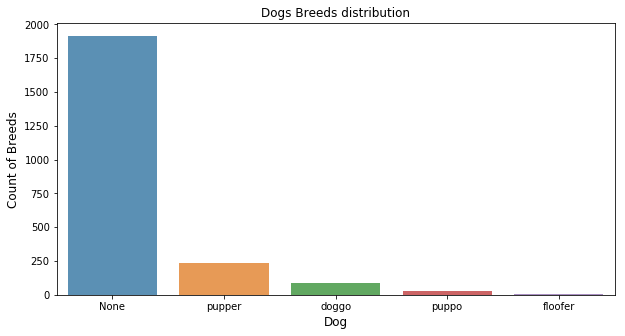

In [69]:
breeds_dist=tweeter_archive_clean_data['breeds'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(breeds_dist.index,breeds_dist.values,alpha=0.8)
plt.title('Dogs Breeds distribution')
plt.ylabel('Count of Breeds',fontsize=12)
plt.xlabel('Dog',fontsize=12)
plt.show()

In [70]:
breeds_dist

None       1914
pupper      236
doggo        87
puppo        28
floofer       9
Name: breeds, dtype: int64

##### Insight

We can see the most have not classfied species

Most of number of dogs belongs to 'pupper' , 2nd is 'doggo' ,3rd is 'pupoo' and 4th is 'foofer'

##### 3)Average length of tweet

##### Define

Iterate through the entire and find the average the length

In [71]:
total_len=0
total_row=tweeter_archive_clean_data.shape[0]
for index,row in tweeter_archive_clean_data.iterrows():
    total_len +=len(row['text'])
avg_len_tweet=(total_len/total_row)
avg_len_tweet

120.17634124890061

##### Insight

We can see that average length of tweet is 120 character.We can see that most of the dogs lover want to say so much about the characterstics of their pet dog